In [55]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import h5py
import pandas as pd
import cartopy.crs as ccrs



In [30]:
adjusted = np.load('out/out6.npy')
adjusted.shape

(1000, 2)

In [31]:
dir_path = r"C:\Users\simon\Documents\Skole\EIT\Tare_Naturbase"

In [32]:
filename = "HyperSpectral4.he5"

filename = dir_path + "/" + filename

In [33]:
with h5py.File(filename, mode='r') as f:
    data = np.array(f["HDFEOS"]["SWATHS"]["PRS_L1_HRC"]["Data Fields"]['VNIR_Cube'])
    lat = np.array(f["HDFEOS"]["SWATHS"]["PRS_L1_HRC"]['Geolocation Fields']['Latitude_VNIR'])
    lon = np.array(f["HDFEOS"]["SWATHS"]["PRS_L1_HRC"]['Geolocation Fields']['Longitude_VNIR'])

In [34]:
data_with_coord = np.zeros((1000,1000,66+2))
data_with_coord[:,:,:66] = np.transpose(data,[0,2,1])
data_with_coord[:,:,66:] = adjusted

In [35]:
RGB = np.dstack((data_with_coord[:,:,33] , data_with_coord[:,:,45] , data_with_coord[:,:,56]))


In [36]:
def normalise(pic):
  max = pic.max()
  min = pic.min()
  new = (pic - min)/(max-min)
  return new

In [37]:
RGB = normalise(RGB)

In [61]:
columns = ["band_1", "band_2", "band_3"] #400nm - 1010nm

for x in [f"band_{400 + i*10}" for i in range(0, 63)]:
    columns.append(x)
columns.append("lon")
columns.append("lat")

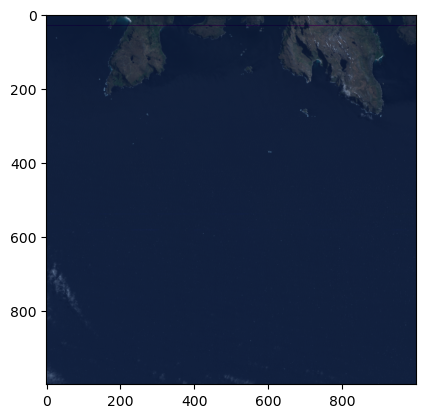

In [62]:
plt.imshow(RGB)


In [63]:
data_for_dataframe = data_with_coord.reshape(1000000, 68)
df = pd.DataFrame(data_for_dataframe, columns=columns)

In [66]:
lat = df.lon.array
lon = df.lat.array
value = df["band_400"].array
bands = df.columns[:-2]

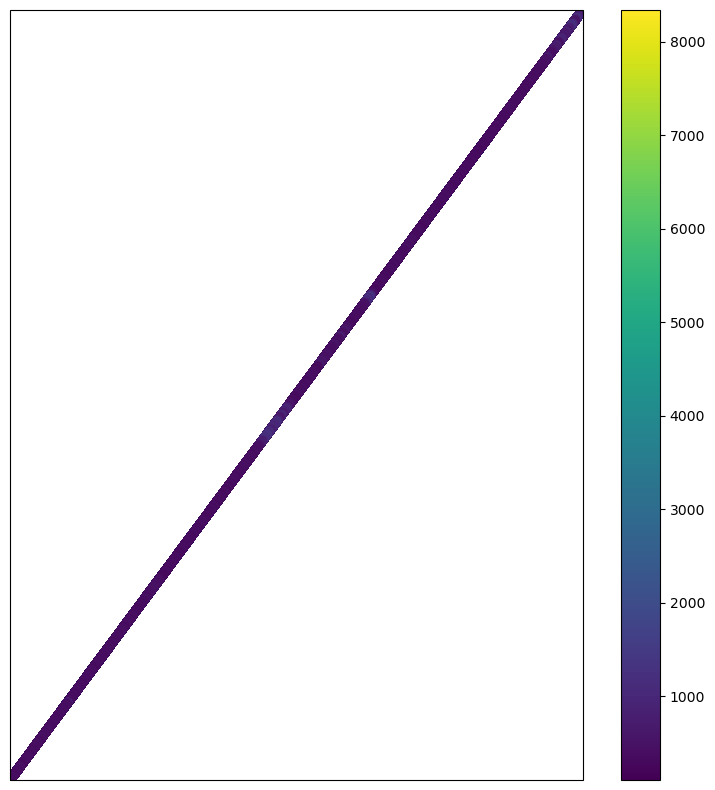

In [67]:
#value = df["band_510"].array

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
# Plot the map projection
ax.set_extent([min(lon), max(lon), min(lat), max(lat)], crs=ccrs.Mercator())

# Plot the latitude and longitude values, with the color of the marker indicating the data value
scatter = ax.scatter(lon, lat, c=value, cmap='viridis', transform=ccrs.Mercator())

# Add a colorbar to the plot
plt.colorbar(scatter)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

""" ax.set_xticks(np.arange(int(min(lon)), int(max(lon)) + 1, 1))
ax.set_yticks(np.arange(int(min(lat)), int(max(lat)) + 1, 1))
ax.set_xticklabels(np.arange(int(min(lon)), int(max(lon)) + 1, 1))
ax.set_yticklabels(np.arange(int(min(lat)), int(max(lat)) + 1, 1)) """
""" ax.set_xticks(np.arange(np.min(lon), np.max(lon)+1, 0.1))
ax.set_yticks(np.arange(np.min(lat), np.max(lat)+1, 0.1))
ax.set_xticklabels(np.arange(np.min(lon), np.max(lon)+1, 0.1))
ax.set_yticklabels(np.arange(np.min(lat), np.max(lat)+1, 0.1)) """

#ax.invert_yaxis()

# Show the plot
#plt.savefig(f"out/{band}_he4.png")
plt.show()